In [174]:
# importing necessary liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,ConfusionMatrixDisplay
import pickle
import warnings
warnings.filterwarnings('ignore')

In [101]:
# cretaing a dataframe from csv file
data=pd.read_csv("D:/Third Semester/NN and DL - Ishant Gupta/week 2/ml-with-python-course-project/train.csv")

In [102]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [103]:
df = data.copy()

In [104]:
# dropping unnecessary columns
df.drop(columns=['sl_no','salary'],axis=1,inplace=True)

In [105]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 22.0+ KB


In [107]:
df.describe()

,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186
std,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385
min,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000
max,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000


In [108]:
# checking Null values
df.isnull().sum().sort_values(ascending=True)

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [109]:
lb = LabelEncoder()
df['status'] = lb.fit_transform(df['status'])

In [111]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


# EDA

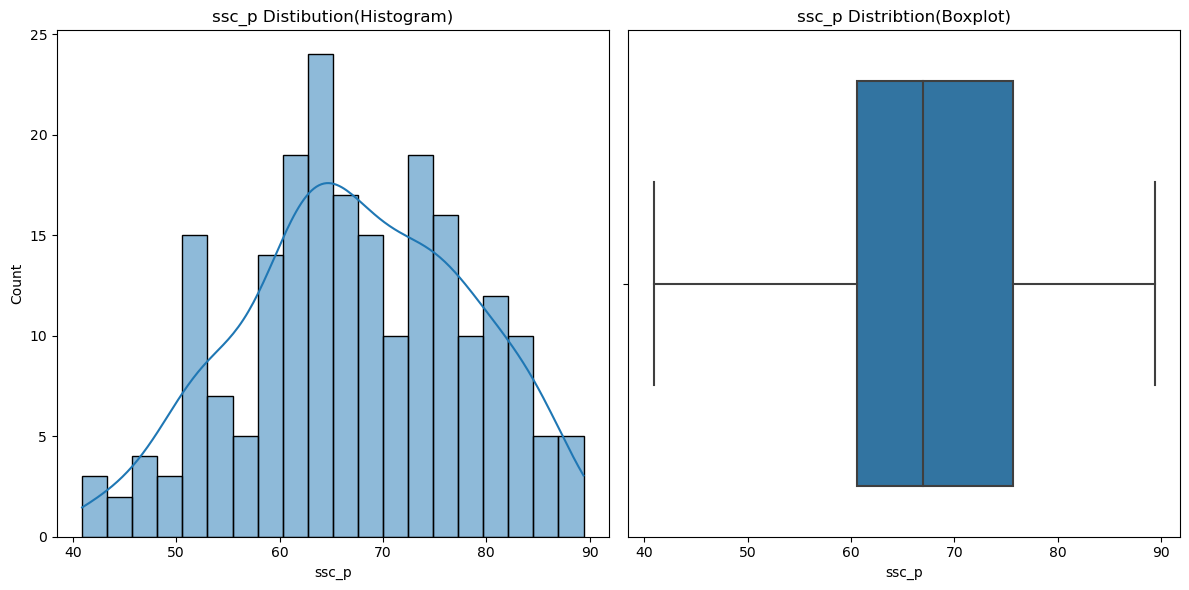

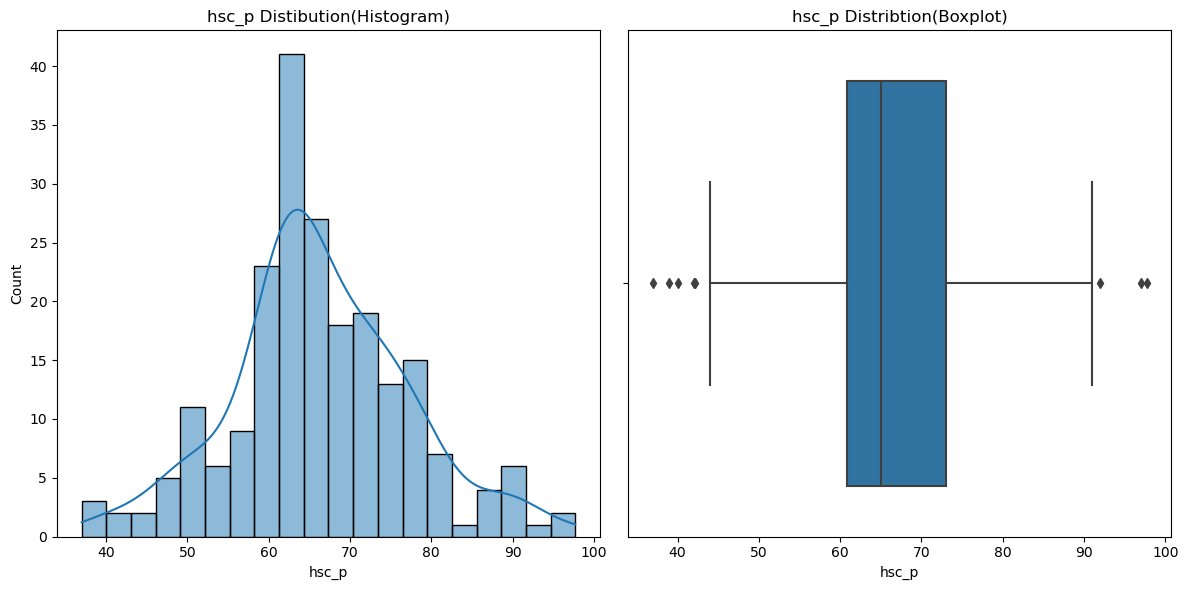

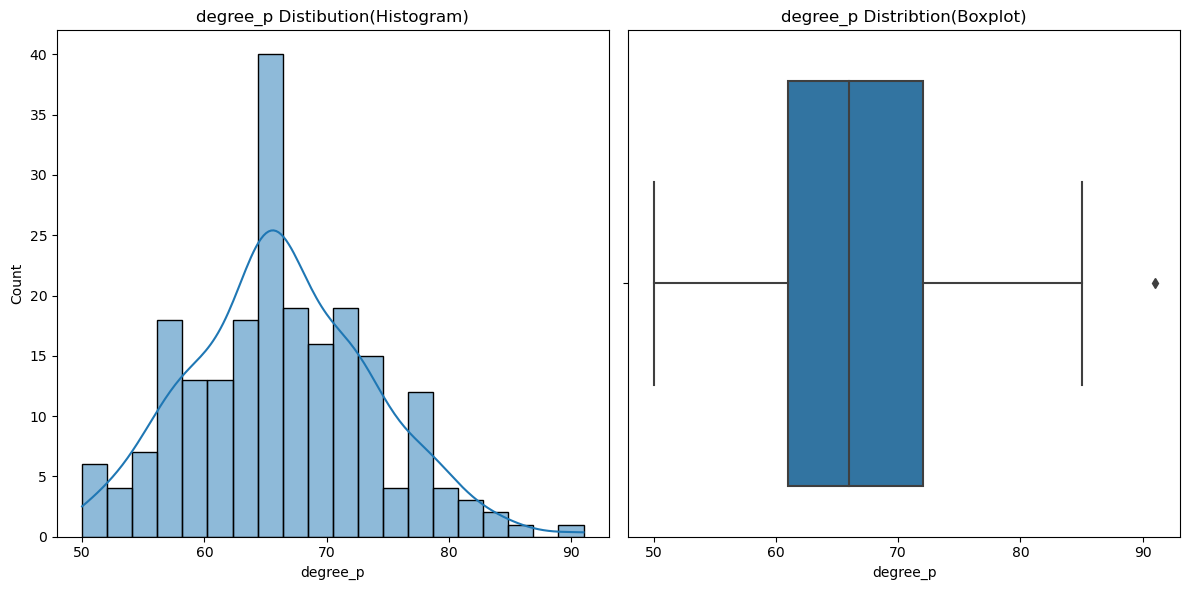

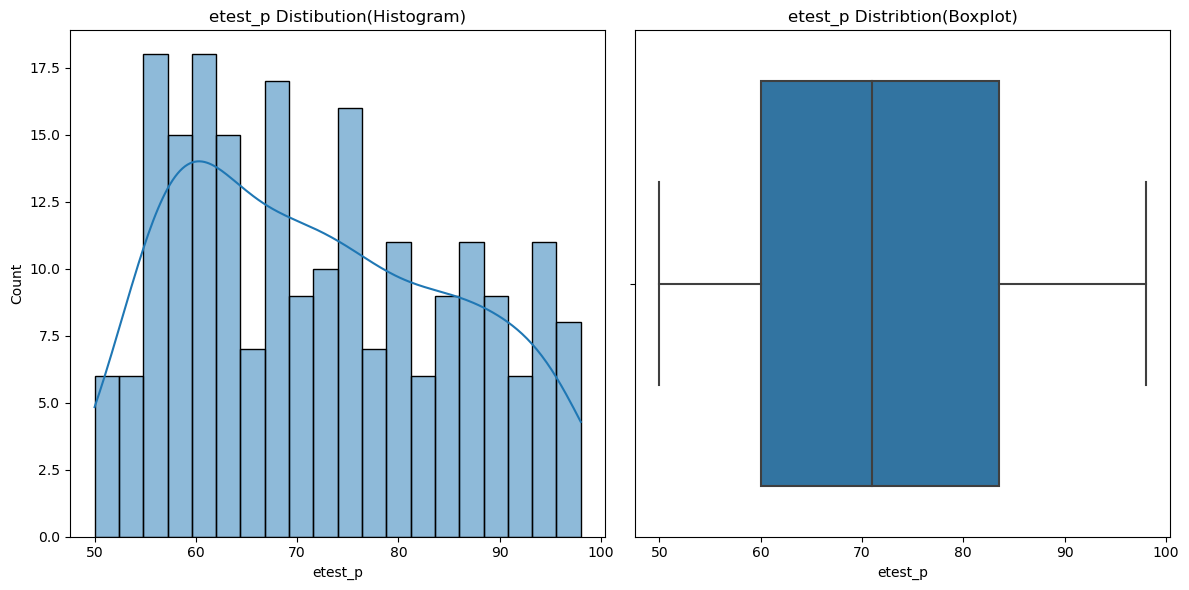

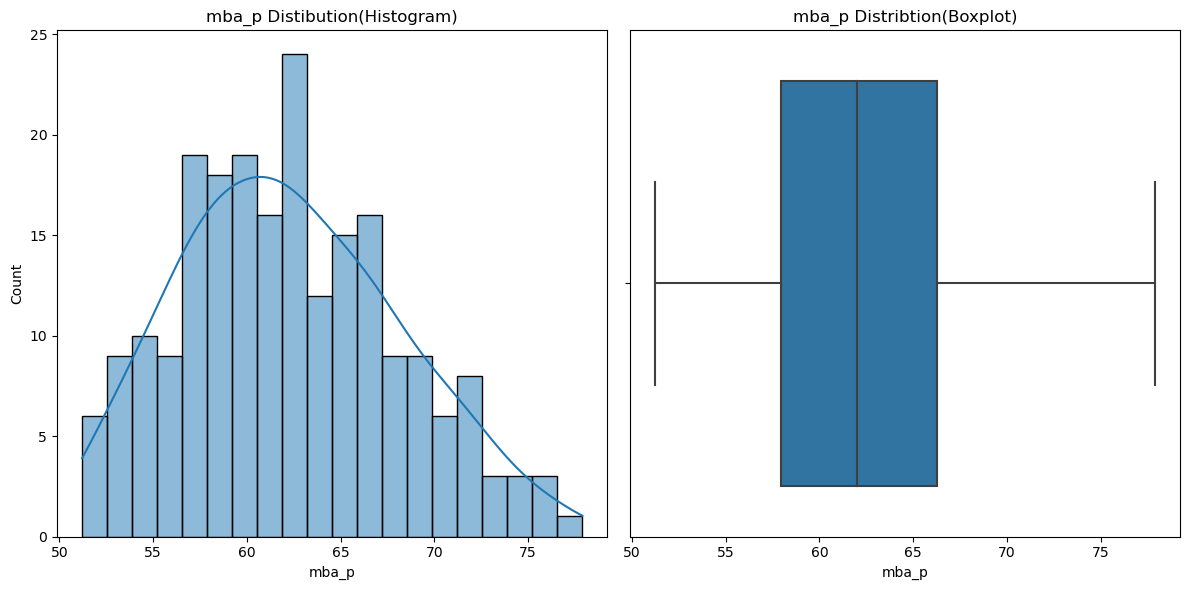

In [112]:
# Distribution of data

# list of continuous variables
continuous_var= ['ssc_p','hsc_p','degree_p','etest_p','mba_p']

for col in continuous_var:
    plt.figure(figsize=(12,6))
    
    # plotting Histogram with KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True,bins=20)
    plt.title(f'{col} Distibution(Histogram)')
    
    # plotting Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Distribtion(Boxplot)')
    
    plt.tight_layout()
    plt.show()

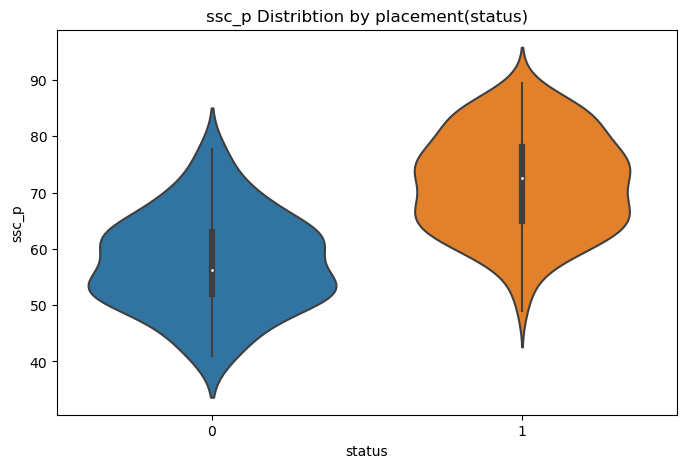

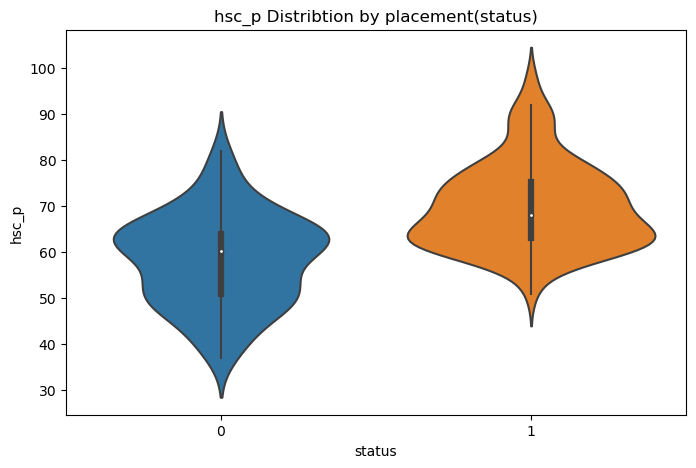

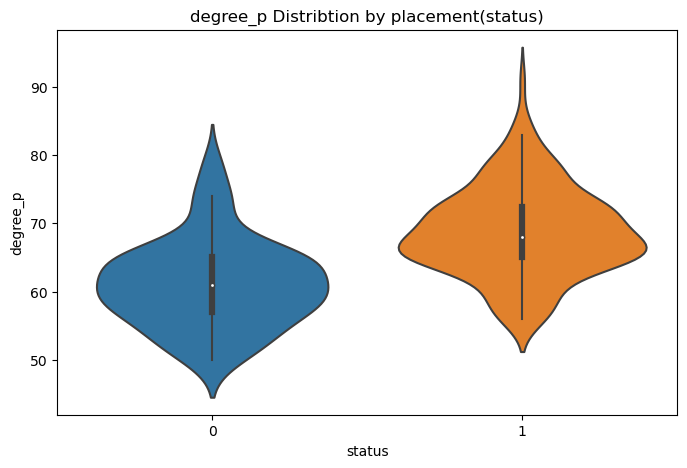

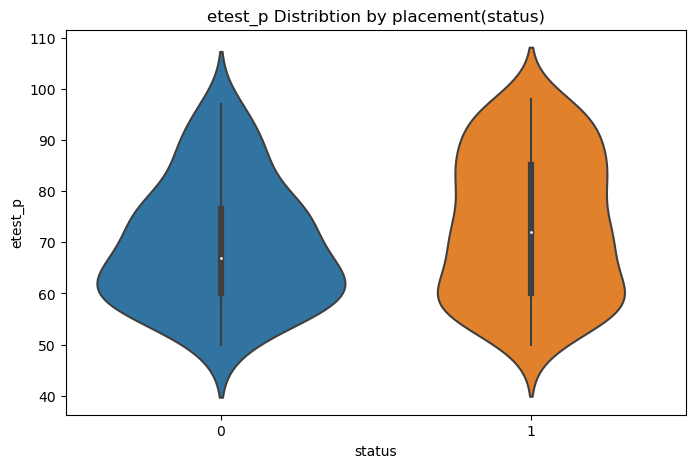

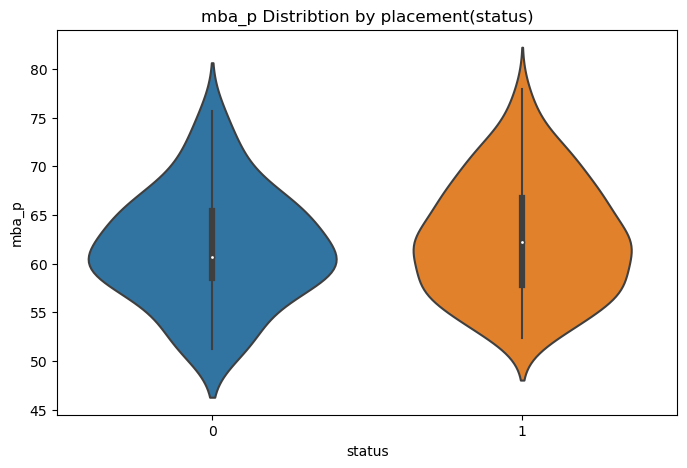

In [82]:
# Plotting violin plot for continuous variable against 'status'
for col in continuous_var:
    plt.figure(figsize=(8,5))
    sns.violinplot(x='status',y=col,data=df)
    plt.title(f'{col} Distribtion by placement(status)')
    plt.show()

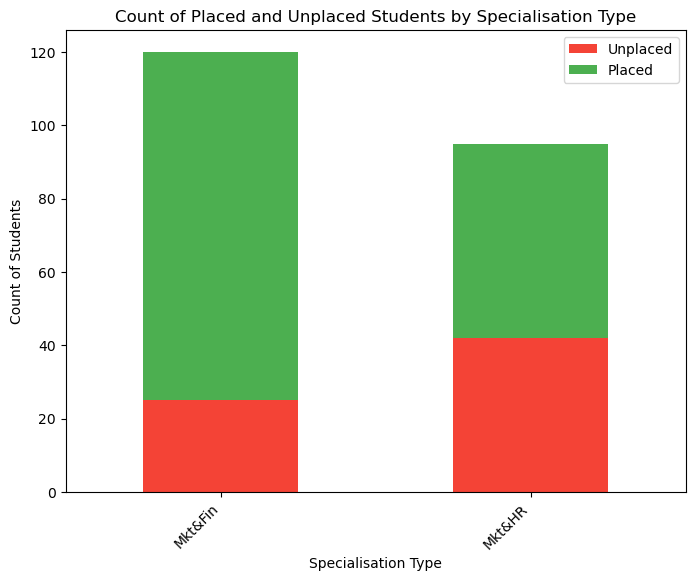

In [122]:
# Count of placed and unplaced students by specialisation type

# Group the data by specialization and status to calculate the count
placement_counts = df.groupby(['specialisation', 'status']).size().unstack(fill_value=0)

# Plotting the graph (count of placed and unplaced students)
placement_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#F44336','#4CAF50'])

# Adding labels and title
plt.xlabel('Specialisation Type')
plt.ylabel('Count of Students')
plt.title('Count of Placed and Unplaced Students by Specialisation Type')
plt.xticks(rotation=45, ha='right')
plt.legend(['Unplaced', 'Placed'])
plt.show()

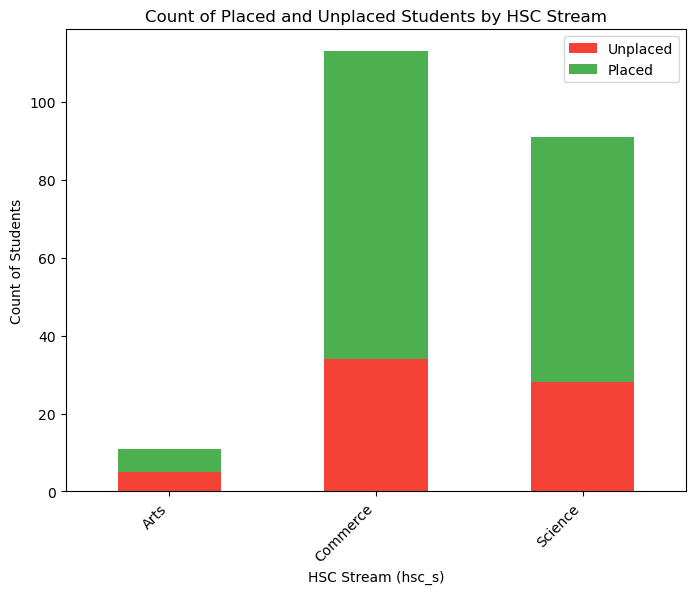

In [124]:
#Count of placed and unplaced student by HSC stream

# Group the data by hsc_s and status to calculate the count
placement_counts_hsc_s = df.groupby(['hsc_s', 'status']).size().unstack(fill_value=0)

# Plotting the graph (count of placed and unplaced students)
placement_counts_hsc_s.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#F44336','#4CAF50'])

# Adding labels and title
plt.xlabel('HSC Stream (hsc_s)')
plt.ylabel('Count of Students')
plt.title('Count of Placed and Unplaced Students by HSC Stream')
plt.xticks(rotation=45, ha='right')
plt.legend(['Unplaced', 'Placed'])
plt.show()

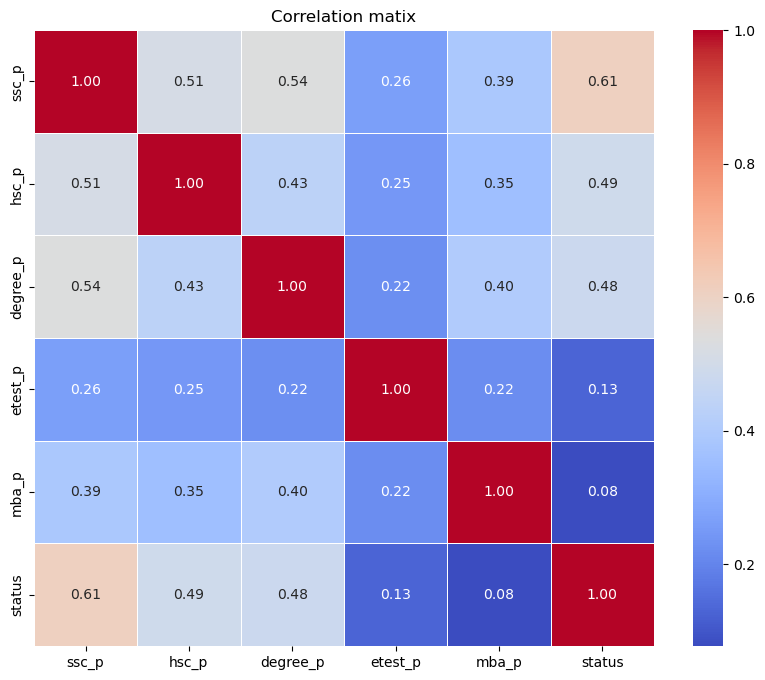

In [129]:
# corelation matrix
num_cols = ['ssc_p','hsc_p','degree_p','etest_p','mba_p','status']

plt.figure(figsize=(10,8))
sns.heatmap(df1[num_cols].corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation matix')
plt.show()

In [113]:
# Column Transforming the data

num_cols = ['ssc_p','hsc_p','degree_p','etest_p','mba_p']
cat_cols = ['ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']

col_trans =ColumnTransformer(transformers=[('OneHot',OneHotEncoder(drop='first'),cat_cols),
                             ('Standard',StandardScaler(),num_cols)],remainder='passthrough')
                                                                    # remainder = passthrough means that remaining undefined cols will pass through as it is


In [132]:
# splitting the dataset in train and test data
X = df.drop('status',axis=1)
y = df['status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
# splittig data in 80/20 ratio due to small amont of data as there should be suffient amount of data to train


In [191]:
X_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
93,0,52.00,Central,62.0,Central,Commerce,54.0,Comm&Mgmt,No,72.00,Mkt&HR,55.41
84,0,70.00,Central,63.0,Others,Science,70.0,Sci&Tech,Yes,55.00,Mkt&Fin,62.00
95,0,73.00,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16
137,0,67.00,Others,63.0,Central,Commerce,72.0,Comm&Mgmt,No,56.00,Mkt&HR,60.41
210,0,80.60,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,61.08,Others,50.0,Others,Science,54.0,Sci&Tech,No,71.00,Mkt&Fin,65.69
14,0,62.00,Central,47.0,Central,Commerce,50.0,Comm&Mgmt,No,76.00,Mkt&HR,54.96
92,1,60.23,Central,69.0,Central,Science,66.0,Comm&Mgmt,No,72.00,Mkt&Fin,59.47
179,1,77.80,Central,64.0,Central,Science,64.2,Sci&Tech,No,75.50,Mkt&HR,72.14


In [192]:
X_tr_trans = col_trans.fit_transform(X_train)
X_te_trans = col_trans.transform(X_test)

In [135]:
X_tr_trans[0]

array([ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        , -1.39473047, -0.35425688,
       -1.60185427, -0.05132613, -1.15170167,  0.        ])

# Model Selection
## will be cretaing 3 different classification models as we need to classify rather the student will get placed or not:
### 1. Logistic Regression 2. Decision tree and 3. Randomforest regressor

# # 1. Logistic Regression

In [139]:
# logistic regresion
from sklearn.linear_model import LogisticRegression

# Initializing logistic Regression model
lr = LogisticRegression(random_state=42)

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers for logistic regression
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Set up Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_tr_trans,y_train)




Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [148]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Best model
lr_best_model = grid_search.best_estimator_

Best Parameters: {'C': 1, 'max_iter': 100, 'solver': 'saga'}
Best Cross-Validation Score: 0.8658823529411764


In [155]:
#evaluate on test data
y_pred = lr_best_model.predict(X_te_trans)
print("Test Accuracy of best Logistic Regression model:", accuracy_score(y_test, y_pred))

Test Accuracy of best Logistic Regression model: 0.8837209302325582


In [150]:
# probability of prediction
y_pred_prob = lr_best_model.predict_proba(X_te_trans)
pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Prob_placed':y_pred_prob[:,0],'Prob_notplaced':y_pred_prob[:,1]}).head()

,Actual,Predicted,Prob_placed,Prob_notplaced
200,1,1,0.057821,0.942179
212,1,1,0.044207,0.955793
138,1,1,0.029449,0.970551
176,1,0,0.918611,0.081389
15,1,1,0.074470,0.925530


logistic Regression 

Accuracy Score: 0.8837209302325582
Precision Score: 0.90625
Recall Score: 0.9354838709677419
F1 Score: 0.9206349206349206

CNF_Matrix:
 [[ 9  3]
 [ 2 29]]



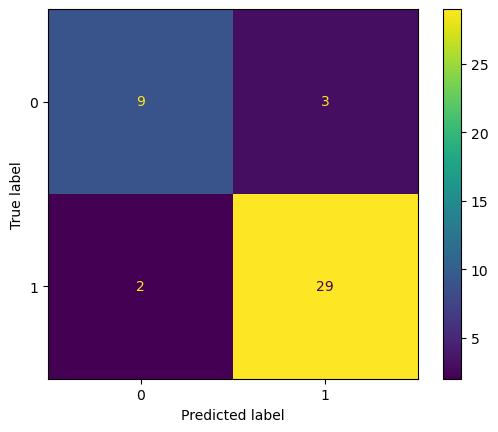

In [171]:
# evaluate the model
print('logistic Regression \n')
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))
print()
print('CNF_Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print(ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=lr_best_model.classes_).plot())
plt.show()

# # 2. Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier

# Initializing Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # The number of features to consider when looking for the best split
}

# Set up Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search_dt.fit(X_tr_trans, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [154]:
# Best parameters and best score
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Cross-Validation Score:", grid_search_dt.best_score_)

# Best model
dt_best_model = grid_search_dt.best_estimator_


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Score: 0.802016806722689


In [156]:
#evaluate on test data
y_pred_dt = dt_best_model.predict(X_te_trans)
print("Test Accuracy of best Decision Tree model:", accuracy_score(y_test, y_pred_dt))

Test Accuracy of best Decision Tree model: 0.7441860465116279


Decision Tree 

Accuracy Score: 0.7441860465116279
Precision Score: 0.7777777777777778
Recall Score: 0.9032258064516129
F1 Score: 0.835820895522388

CNF_Matrix:
 [[ 4  8]
 [ 3 28]]



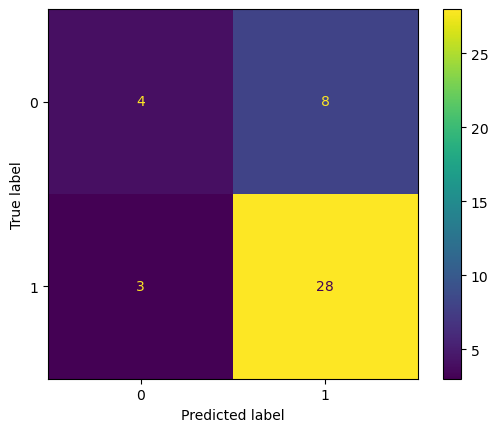

In [173]:
# evaluate the model
print('Decision Tree \n')
print('Accuracy Score:',accuracy_score(y_test,y_pred_dt))
print('Precision Score:',precision_score(y_test,y_pred_dt))
print('Recall Score:',recall_score(y_test,y_pred_dt))
print('F1 Score:',f1_score(y_test,y_pred_dt))
print()
print('CNF_Matrix:\n',confusion_matrix(y_test,y_pred_dt))
print()
print(ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dt),display_labels=dt_best_model.classes_).plot())
plt.show()

# # 3. Random Forest Regressor

In [163]:
from sklearn.ensemble import RandomForestClassifier

# Initializing Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)

# Defining hyperparameter grid for Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # The number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether to use bootstrap samples when building trees
}

# Set up Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search_rf.fit(X_tr_trans, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [164]:
# Best parameters and best score
print('Best Parameters:', grid_search_rf.best_params_)
print('Best Cross-Validation Score:', grid_search_rf.best_score_)

# Best model
rf_best_model = grid_search_rf.best_estimator_

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.8778151260504202


In [165]:
#evaluate on test data
y_pred_rf = rf_best_model.predict(X_te_trans)
print('Test Accuracy of best Random Forest model:', accuracy_score(y_test, y_pred_rf))

Test Accuracy of best Random Forest model: 0.7906976744186046


Random Forest Classifier 

Accuracy Score: 0.7906976744186046
Precision Score: 0.8055555555555556
Recall Score: 0.9354838709677419
F1 Score: 0.8656716417910448

CNF_Matrix:
 [[ 5  7]
 [ 2 29]]



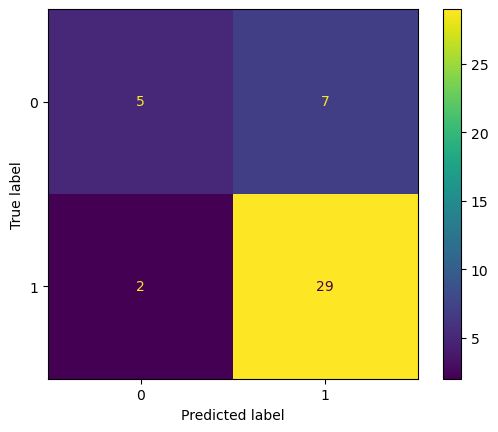

In [172]:
# evaluate the model
print('Random Forest Classifier \n')
print('Accuracy Score:',accuracy_score(y_test,y_pred_rf))
print('Precision Score:',precision_score(y_test,y_pred_rf))
print('Recall Score:',recall_score(y_test,y_pred_rf))
print('F1 Score:',f1_score(y_test,y_pred_rf))
print()
print('CNF_Matrix:\n',confusion_matrix(y_test,y_pred_rf))
print()
print(ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rf),display_labels=rf_best_model.classes_).plot())
plt.show()

# # 4. Voting Classifier

In [168]:
from sklearn.ensemble import VotingClassifier

# Create the Voting Classifier (hard voting)
voting_clf = VotingClassifier(estimators=[('lr', lr_best_model),('dt', dt_best_model),('rf', rf_best_model)], voting='hard') 
                                                                                           # Using 'hard' voting (majority rule)

voting_pred = voting_clf.fit(X_tr_trans, y_train).predict(X_te_trans)

voting_accuracy = accuracy_score(y_test, voting_pred)

print('Voting Classifier Accuracy: ',voting_accuracy)


Voting Classifier Accuracy:  0.7906976744186046


In [178]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation to evaluate the model's performance
cv_voting = cross_val_score(voting_clf, X_tr_trans, y_train, cv=5, scoring='accuracy').mean()

print('Cross-validated Voting Classifier Accuracy: ',cv_voting)

Cross-validated Voting Classifier Accuracy:  0.8489075630252101


In [179]:
print('Logistic Regression Accuracy Score:',accuracy_score(y_test,y_pred))
print('Decision Tree classifier Accuracy Score:',accuracy_score(y_test,y_pred_dt))
print('Random Forest classifier Accuracy Score:',accuracy_score(y_test,y_pred_rf))
print('Cross-validated Voting Classifier Accuracy: ',cv_voting)

Logistic Regression Accuracy Score: 0.8837209302325582
Decision Tree classifier Accuracy Score: 0.7441860465116279
Random Forest classifier Accuracy Score: 0.7906976744186046
Cross-validated Voting Classifier Accuracy:  0.8489075630252101


In [194]:
# creating pickle files

# creating pickle file of voting classifier
with open('D:/Third Semester/NN and DL - Ishant Gupta/campus_placement_prediction/voting_classifier.pkl', 'wb') as model_file:
    pickle.dump(voting_clf, model_file)
    
# creating pickle file of 
with open('D:/Third Semester/NN and DL - Ishant Gupta/campus_placement_prediction/column_transformer.pkl', 'wb') as file:
    pickle.dump(col_trans, file)
    

In [195]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: D:\softwares\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex, shap
